In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
Plant_1_Generation_Data = pd.read_csv("Plant_1_Generation_Data.csv", sep=',')

In [4]:
Plant_1_Weather = pd.read_csv("Plant_1_Weather_Sensor_Data.csv", sep=',')

In [5]:
Plant_2_Generation_Data = pd.read_csv("Plant_2_Generation_Data.csv", sep=',')

In [6]:
Plant_2_Weather = pd.read_csv("Plant_2_Weather_Sensor_Data.csv", sep=',')

GENERAL EXPLORATION

In [7]:
Plant_1_Generation_Data.columns

Index(['DATE_TIME', 'PLANT_ID', 'SOURCE_KEY', 'DC_POWER', 'AC_POWER',
       'DAILY_YIELD', 'TOTAL_YIELD'],
      dtype='object')

In [8]:
Plant_1_Generation_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    68778 non-null  object 
 1   PLANT_ID     68778 non-null  int64  
 2   SOURCE_KEY   68778 non-null  object 
 3   DC_POWER     68778 non-null  float64
 4   AC_POWER     68778 non-null  float64
 5   DAILY_YIELD  68778 non-null  float64
 6   TOTAL_YIELD  68778 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.7+ MB


In [9]:
Plant_1_Generation_Data.describe()

,PLANT_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
count,68778.0,68778.000000,68778.000000,68778.000000,6.877800e+04
mean,4135001.0,3147.426211,307.802752,3295.968737,6.978712e+06
std,0.0,4036.457169,394.396439,3145.178309,4.162720e+05
min,4135001.0,0.000000,0.000000,0.000000,6.183645e+06
25%,4135001.0,0.000000,0.000000,0.000000,6.512003e+06
50%,4135001.0,429.000000,41.493750,2658.714286,7.146685e+06
75%,4135001.0,6366.964286,623.618750,6274.000000,7.268706e+06
max,4135001.0,14471.125000,1410.950000,9163.000000,7.846821e+06


In [10]:
Plant_1_Generation_Data[7000:7050]

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
7000,18-05-2020 11:15,4135001,adLQvlD726eNBSB,7335.375000,718.225000,1207.500000,6293517.500
7001,18-05-2020 11:15,4135001,bvBOhCH3iADSZry,6427.875000,629.687500,1084.875000,6336660.875
7002,18-05-2020 11:15,4135001,iCRJl6heRkivqQ3,7221.142857,707.071429,1163.714286,7199530.714
7003,18-05-2020 11:15,4135001,ih0vzX44oOqAx2f,6965.285714,682.128571,1141.714286,6206342.714
7004,18-05-2020 11:15,4135001,pkci93gMrogZuBj,7291.857143,713.971429,1151.857143,7190198.857
7005,18-05-2020 11:15,4135001,rGa61gmuvPhdLxV,7244.714286,709.357143,1161.285714,7132698.286
7006,18-05-2020 11:15,4135001,sjndEbLyjtCKgGv,7112.428571,696.485714,1163.571429,7038217.571
7007,18-05-2020 11:15,4135001,uHbuxQJl8lW7ozc,7279.142857,712.742857,1165.000000,7059958.000
7008,18-05-2020 11:15,4135001,wCURE6d3bPkepu2,7112.714286,696.514286,1168.285714,6804168.286
7009,18-05-2020 11:15,4135001,z9Y9gH1T5YWrNuG,6979.714286,683.514286,1166.714286,7029392.714


In [11]:
Plant_1_Generation_Data['SOURCE_KEY'].value_counts()

SOURCE_KEY
bvBOhCH3iADSZry    3155
1BY6WEcLGh8j5v7    3154
7JYdWkrLSPkdwr4    3133
VHMLBKoKgIrUVDU    3133
ZnxXDlPa8U1GXgE    3130
ih0vzX44oOqAx2f    3130
z9Y9gH1T5YWrNuG    3126
wCURE6d3bPkepu2    3126
uHbuxQJl8lW7ozc    3125
pkci93gMrogZuBj    3125
iCRJl6heRkivqQ3    3125
rGa61gmuvPhdLxV    3124
sjndEbLyjtCKgGv    3124
McdE0feGgRqW7Ca    3124
zVJPv84UY57bAof    3124
ZoEaEvLYb1n2sOq    3123
1IF53ai7Xc0U56Y    3119
adLQvlD726eNBSB    3119
zBIq5rxdHJRwDNY    3119
WRmjgnKYAwPKWDb    3118
3PZuoBAID5Wc2HD    3118
YxYtjZvoooNbGkE    3104
Name: count, dtype: int64

In [12]:
Plant_1_Generation_Data2 = Plant_1_Generation_Data.copy()

In [13]:
# Converti la colonna DATE_TIME in formato datetime
Plant_1_Generation_Data2['DATE_TIME'] = pd.to_datetime(Plant_1_Generation_Data2['DATE_TIME'], format='%d-%m-%Y %H:%M')

In [14]:
ac_power_total = Plant_1_Generation_Data2.groupby(['SOURCE_KEY'])['AC_POWER'].sum().reset_index()
ac_power_total

,SOURCE_KEY,AC_POWER
0,1BY6WEcLGh8j5v7,886665.326069
1,1IF53ai7Xc0U56Y,984007.153452
2,3PZuoBAID5Wc2HD,982068.208928
3,7JYdWkrLSPkdwr4,959906.307338
4,McdE0feGgRqW7Ca,981080.708217
5,VHMLBKoKgIrUVDU,983449.000642
6,WRmjgnKYAwPKWDb,962138.298813
7,YxYtjZvoooNbGkE,965127.756186
8,ZnxXDlPa8U1GXgE,977644.316190
9,ZoEaEvLYb1n2sOq,958700.484522


In [15]:
dc_power_total = Plant_1_Generation_Data2.groupby(['SOURCE_KEY'])['DC_POWER'].sum().reset_index()
dc_power_total

,SOURCE_KEY,DC_POWER
0,1BY6WEcLGh8j5v7,9.063716e+06
1,1IF53ai7Xc0U56Y,1.006294e+07
2,3PZuoBAID5Wc2HD,1.004313e+07
3,7JYdWkrLSPkdwr4,9.815350e+06
4,McdE0feGgRqW7Ca,1.003212e+07
5,VHMLBKoKgIrUVDU,1.005725e+07
6,WRmjgnKYAwPKWDb,9.838489e+06
7,YxYtjZvoooNbGkE,9.869145e+06
8,ZnxXDlPa8U1GXgE,9.997405e+06
9,ZoEaEvLYb1n2sOq,9.803128e+06


In [16]:
dc_ac_power_total = pd.merge(dc_power_total,ac_power_total, on=['SOURCE_KEY'], how='inner')

In [17]:
dc_ac_power_total['DC-AC'] = dc_power_total['DC_POWER'] - ac_power_total['AC_POWER']

In [18]:
dc_ac_power_total

,SOURCE_KEY,DC_POWER,AC_POWER,DC-AC
0,1BY6WEcLGh8j5v7,9.063716e+06,886665.326069,8.177051e+06
1,1IF53ai7Xc0U56Y,1.006294e+07,984007.153452,9.078937e+06
2,3PZuoBAID5Wc2HD,1.004313e+07,982068.208928,9.061059e+06
3,7JYdWkrLSPkdwr4,9.815350e+06,959906.307338,8.855444e+06
4,McdE0feGgRqW7Ca,1.003212e+07,981080.708217,9.051043e+06
5,VHMLBKoKgIrUVDU,1.005725e+07,983449.000642,9.073802e+06
6,WRmjgnKYAwPKWDb,9.838489e+06,962138.298813,8.876350e+06
7,YxYtjZvoooNbGkE,9.869145e+06,965127.756186,8.904017e+06
8,ZnxXDlPa8U1GXgE,9.997405e+06,977644.316190,9.019761e+06
9,ZoEaEvLYb1n2sOq,9.803128e+06,958700.484522,8.844427e+06


__Plant1_1BY6WEcLGh8j5v7_inverter per 15 16 e 17__

In [19]:
# Filtrare le osservazioni basate sul 'SOURCE_KEY'
Plant1_1BY6WEcLGh8j5v7 = Plant_1_Generation_Data[Plant_1_Generation_Data['SOURCE_KEY'] == "1BY6WEcLGh8j5v7"]

In [20]:
# Filtrare le osservazioni per la data specifica
Plant1_1BY6WEcLGh8j5v7_1506 = Plant1_1BY6WEcLGh8j5v7[Plant1_1BY6WEcLGh8j5v7['DATE_TIME'].str.contains("15-06-2020")]
Plant1_1BY6WEcLGh8j5v7_1506['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1506['DATE_TIME'], format='%d-%m-%Y %H:%M')

C:\Users\loris\AppData\Local\Temp\ipykernel_14976\1331006329.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plant1_1BY6WEcLGh8j5v7_1506['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1506['DATE_TIME'], format='%d-%m-%Y %H:%M')


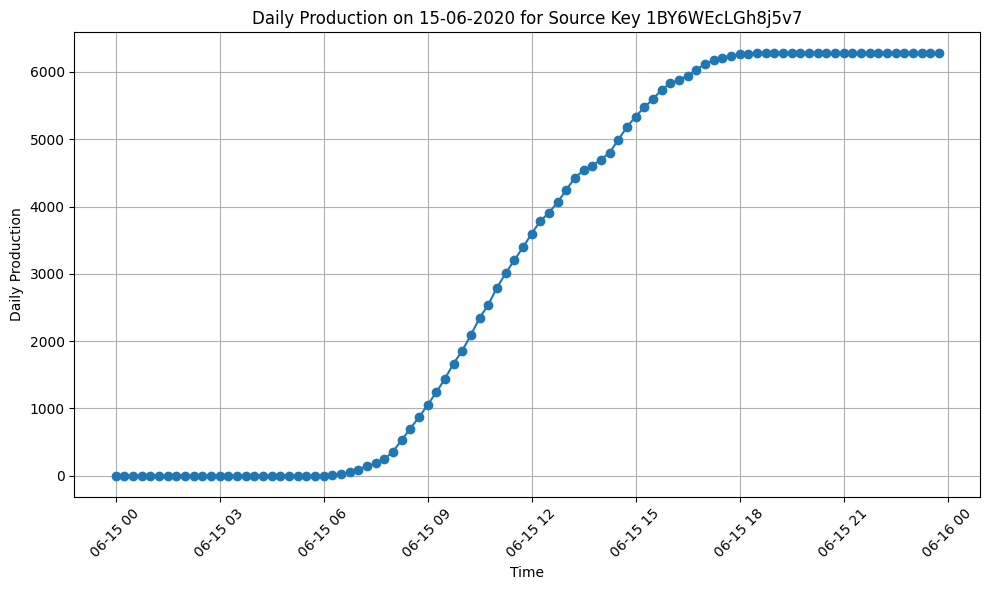

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(Plant1_1BY6WEcLGh8j5v7_1506['DATE_TIME'], Plant1_1BY6WEcLGh8j5v7_1506['DAILY_YIELD'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Daily Production')
plt.title('Daily Production on 15-06-2020 for Source Key 1BY6WEcLGh8j5v7')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [22]:
Plant1_1BY6WEcLGh8j5v7_1606 = Plant1_1BY6WEcLGh8j5v7[Plant1_1BY6WEcLGh8j5v7['DATE_TIME'].str.contains("16-06-2020")]
Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'], format='%d-%m-%Y %H:%M')

C:\Users\loris\AppData\Local\Temp\ipykernel_14976\2368472528.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'], format='%d-%m-%Y %H:%M')


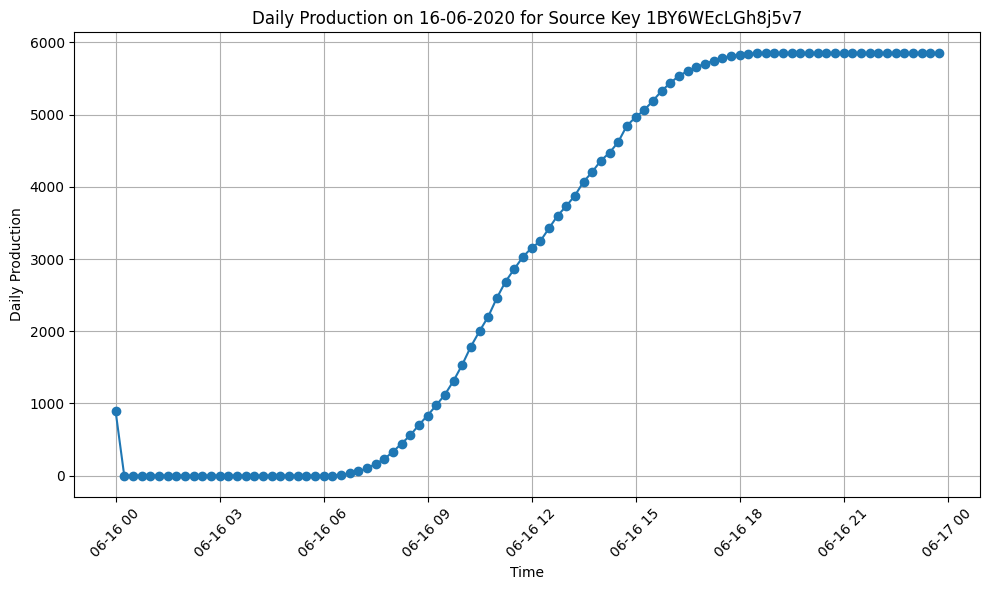

In [23]:
plt.figure(figsize=(10, 6))
plt.plot(Plant1_1BY6WEcLGh8j5v7_1606['DATE_TIME'], Plant1_1BY6WEcLGh8j5v7_1606['DAILY_YIELD'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Daily Production')
plt.title('Daily Production on 16-06-2020 for Source Key 1BY6WEcLGh8j5v7')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
Plant1_1BY6WEcLGh8j5v7_1706 = Plant1_1BY6WEcLGh8j5v7[Plant1_1BY6WEcLGh8j5v7['DATE_TIME'].str.contains("17-06-2020")]
Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'], format='%d-%m-%Y %H:%M')

C:\Users\loris\AppData\Local\Temp\ipykernel_14976\3935717125.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'] = pd.to_datetime(Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'], format='%d-%m-%Y %H:%M')


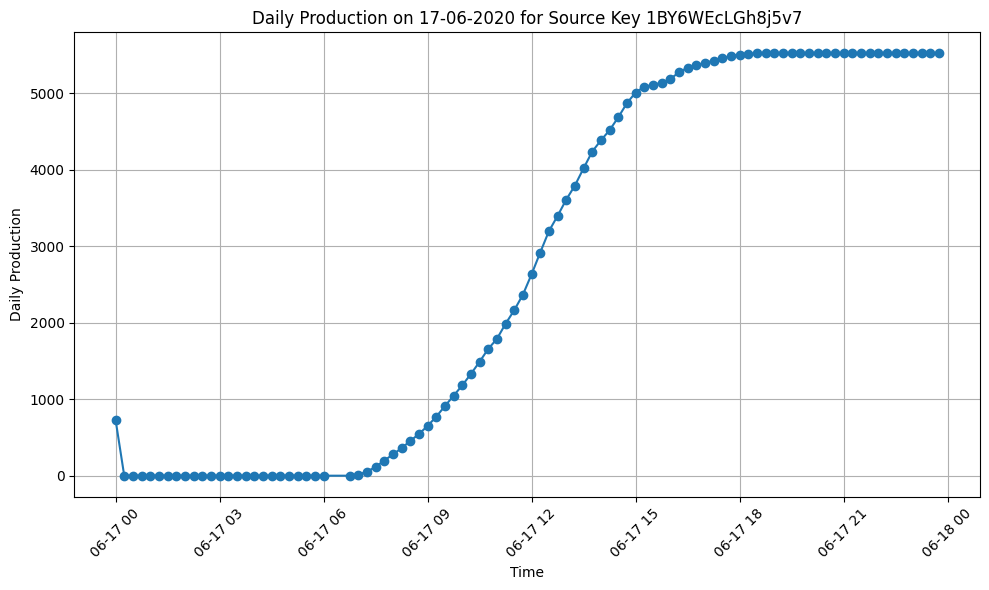

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(Plant1_1BY6WEcLGh8j5v7_1706['DATE_TIME'], Plant1_1BY6WEcLGh8j5v7_1706['DAILY_YIELD'], marker='o', linestyle='-')
plt.xlabel('Time')
plt.ylabel('Daily Production')
plt.title('Daily Production on 17-06-2020 for Source Key 1BY6WEcLGh8j5v7')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

*__JOIN DATASETS__*

In [26]:
Plant_1_Generation_Data

,DATE_TIME,PLANT_ID,SOURCE_KEY,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD
0,15-05-2020 00:00,4135001,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0
1,15-05-2020 00:00,4135001,1IF53ai7Xc0U56Y,0.0,0.0,0.000,6183645.0
2,15-05-2020 00:00,4135001,3PZuoBAID5Wc2HD,0.0,0.0,0.000,6987759.0
3,15-05-2020 00:00,4135001,7JYdWkrLSPkdwr4,0.0,0.0,0.000,7602960.0
4,15-05-2020 00:00,4135001,McdE0feGgRqW7Ca,0.0,0.0,0.000,7158964.0
...,...,...,...,...,...,...,...
68773,17-06-2020 23:45,4135001,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0
68774,17-06-2020 23:45,4135001,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0
68775,17-06-2020 23:45,4135001,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0
68776,17-06-2020 23:45,4135001,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0


In [27]:
Plant_1_Weather

,DATE_TIME,PLANT_ID,SOURCE_KEY,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,2020-05-15 00:00:00,4135001,HmiyD2TTLFNqkNe,25.184316,22.857507,0.0
1,2020-05-15 00:15:00,4135001,HmiyD2TTLFNqkNe,25.084589,22.761668,0.0
2,2020-05-15 00:30:00,4135001,HmiyD2TTLFNqkNe,24.935753,22.592306,0.0
3,2020-05-15 00:45:00,4135001,HmiyD2TTLFNqkNe,24.846130,22.360852,0.0
4,2020-05-15 01:00:00,4135001,HmiyD2TTLFNqkNe,24.621525,22.165423,0.0
...,...,...,...,...,...,...
3177,2020-06-17 22:45:00,4135001,HmiyD2TTLFNqkNe,22.150570,21.480377,0.0
3178,2020-06-17 23:00:00,4135001,HmiyD2TTLFNqkNe,22.129816,21.389024,0.0
3179,2020-06-17 23:15:00,4135001,HmiyD2TTLFNqkNe,22.008275,20.709211,0.0
3180,2020-06-17 23:30:00,4135001,HmiyD2TTLFNqkNe,21.969495,20.734963,0.0


In [28]:
Plant_1_Generation_Data['DATE_TIME'] = pd.to_datetime(Plant_1_Generation_Data['DATE_TIME'], format='%d-%m-%Y %H:%M')
Plant_1_Weather['DATE_TIME'] = pd.to_datetime(Plant_1_Weather['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


Plant_1= pd.merge(Plant_1_Generation_Data, Plant_1_Weather, on=['DATE_TIME'], how='inner')


In [29]:
Plant_1 = Plant_1.drop(columns=['PLANT_ID_x', 'PLANT_ID_y', 'SOURCE_KEY_y'])

In [30]:
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

In [31]:
# Inizializza il modello di regressione
model = LinearRegression()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Inizializza il modello di regressione
model = LinearRegression()

# Inizializza la cross-validation KFold
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Esegui la cross-validation sul training set
cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)

# Calcola la media e la deviazione standard dell'errore quadratico medio (MSE) della cross-validation
cv_mse_scores = -cv_scores
mean_cv_mse = cv_mse_scores.mean()
std_cv_mse = cv_mse_scores.std()

# Allena il modello sul training set completo
model.fit(X_train, y_train)

# Valuta il modello sul test set
y_pred = model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred)

print(f'Mean CV MSE: {mean_cv_mse}')
print(f'Standard Deviation of CV MSE: {std_cv_mse}')
print(f'Test MSE: {test_mse}')


NameError: name 'X' is not defined